In [1]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load data
train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

# Label encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)  # use transform, not fit_transform here!
test_labels = label_encoder.transform(test_labels)

# One-hot encoding
train_labels = to_categorical(train_labels, num_classes=7)
val_labels = to_categorical(val_labels, num_classes=7)
test_labels = to_categorical(test_labels, num_classes=7)

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model_3 

model = create_cnn_model_3(train_data)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

Epoch 1/50


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.2029 - loss: 1.8406 - val_accuracy: 0.4408 - val_loss: 1.2641
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.5508 - loss: 1.0484 - val_accuracy: 0.6550 - val_loss: 0.7970
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.7202 - loss: 0.6672 - val_accuracy: 0.7821 - val_loss: 0.5008
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.8045 - loss: 0.4506 - val_accuracy: 0.8120 - val_loss: 0.4406
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.8423 - loss: 0.3577 - val_accuracy: 0.8443 - val_loss: 0.3357
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.8750 - loss: 0.2671 - val_accuracy: 0.8692 - val_loss: 0.2775
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.8896 - loss: 0.2447 - val_accuracy: 0.8867 - val_loss: 0.2348
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.9045 - loss: 0.2011 - val_accurac

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,355,543 (50.95 MB)

 Trainable params: 4,451,847 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,903,696 (33.96 MB)

26/26 - 1s - 24ms/step - accuracy: 0.9030 - loss: 0.1746


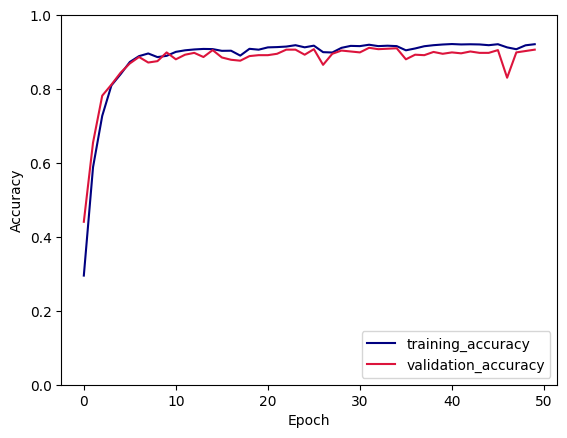

In [3]:
import numpy as np
import matplotlib.pylab as plt

model.summary()
plt.plot(history.history['accuracy'], label='training_accuracy', color="navy")
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy', color="crimson")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


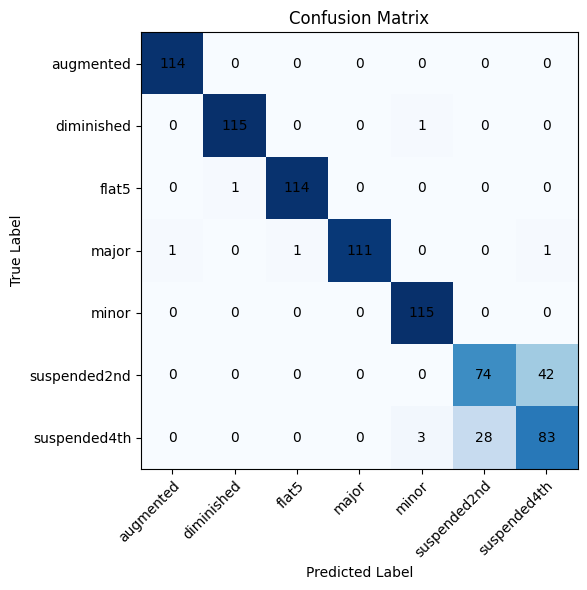

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_names = label_encoder.classes_

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.tight_layout()
plt.show()
